In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle, class_weight
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Read data

In [3]:
df_selected = pd.read_csv('./data/df_selected.csv')

In [4]:
df_selected.shape

(457484, 35)

In [5]:
df_selected.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,457484.0,14560.685237,8536.329074,1000.00,8000.00,12400.00,20000.00,40000.00
funded_amnt,457484.0,14560.685237,8536.329074,1000.00,8000.00,12400.00,20000.00,40000.00
funded_amnt_inv,457484.0,14555.374765,8533.034966,900.00,8000.00,12400.00,20000.00,40000.00
term,457484.0,42.118666,10.459931,36.00,36.00,36.00,60.00,60.00
int_rate,457484.0,13.297232,4.526475,5.32,9.99,12.99,15.99,30.99
installment,457484.0,440.290190,254.193960,14.01,256.23,378.20,580.73,1714.54
grade,457484.0,1.844924,1.331678,0.00,1.00,2.00,3.00,6.00
sub_grade,457484.0,11.201323,6.579267,0.00,6.00,11.00,15.00,34.00
emp_length,457484.0,5.766084,3.724258,0.00,2.00,6.00,10.00,10.00
home_ownership,457484.0,2.397426,1.425130,0.00,1.00,3.00,4.00,4.00


In [28]:
def plot_feature(df, col_name, isContinuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if isContinuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name)
    plt.xticks(rotation = 90)

    # Plot with loan status
    if isContinuous:
        sns.boxplot(y=col_name, x='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by Loan Status')
    else:
        data = df.groupby(col_name)['loan_status'].value_counts(normalize=True).to_frame('proportion').reset_index()        
        sns.barplot(x = col_name, y = 'proportion', hue= "loan_status", data = data, saturation=1, ax=ax2)
        ax2.set_ylabel('Loan fraction')
        ax2.set_title('Loan status')
        plt.xticks(rotation = 90)
    ax2.set_xlabel(col_name)
    
    plt.tight_layout()

### Feature correlations

In [7]:
corr = df_selected.corr(method = 'spearman')

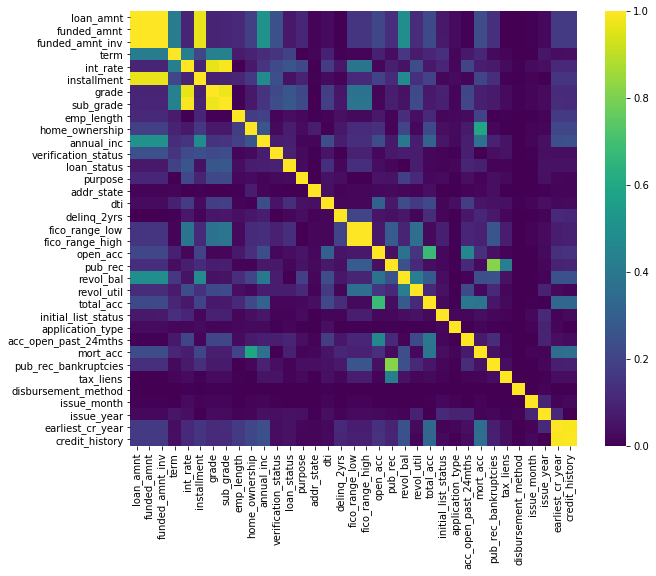

In [8]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr.abs(), cmap ='viridis' )
plt.show()

### Find highly correlated features

In [9]:
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)

In [10]:
new_corr[new_corr.correlation > 0.4]

,level_0,level_1,correlation
35,funded_amnt,loan_amnt,1.000000
647,fico_range_high,fico_range_low,1.000000
71,funded_amnt_inv,funded_amnt,0.999891
70,funded_amnt_inv,loan_amnt,0.999891
1223,credit_history,earliest_cr_year,0.991186
249,sub_grade,int_rate,0.989848
251,sub_grade,grade,0.974838
176,installment,funded_amnt,0.967319
175,installment,loan_amnt,0.967319
177,installment,funded_amnt_inv,0.967174


In [11]:
high_correlated_feat = ['funded_amnt','funded_amnt_inv', 'fico_range_high', 'grade', 
                        'credit_history', 'installment']

In [13]:
df_selected.drop(high_correlated_feat, axis=1, inplace=True)

In [14]:
df_selected.shape

(457484, 29)

### Correlation with target variable

In [18]:
# df_selected.nunique().to_frame().reset_index()

In [25]:
corr_with_target = df_selected.corrwith(df_selected.loan_status).sort_values(ascending = False).abs().to_frame('correlation_with_target').reset_index().head(20)
unique_values = df_selected.nunique().to_frame('unique_values').reset_index()
corr_with_unique = pd.merge(corr_with_target, unique_values, on = 'index', how = 'inner')

In [26]:
corr_with_unique

,index,correlation_with_target,unique_values
0,loan_status,1.000000,2
1,sub_grade,0.275054,35
2,int_rate,0.255399,200
3,term,0.193636,2
4,dti,0.123988,4265
5,acc_open_past_24mths,0.097327,48
6,home_ownership,0.078022,5
7,revol_util,0.076245,1209
8,loan_amnt,0.056580,1415
9,earliest_cr_year,0.038295,68


### Vizualizations

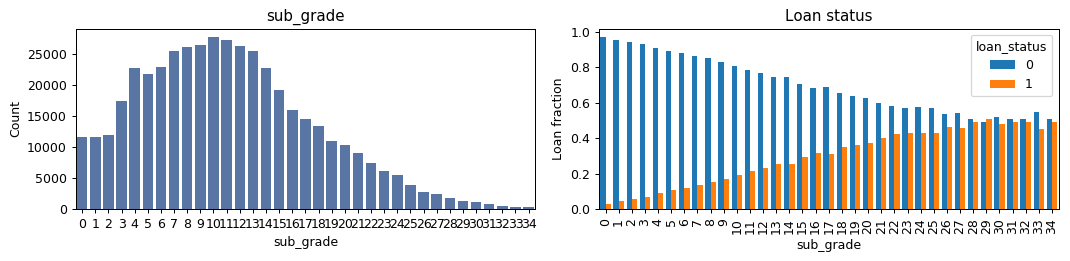

In [68]:
plot_feature(df_selected, 'sub_grade', False)

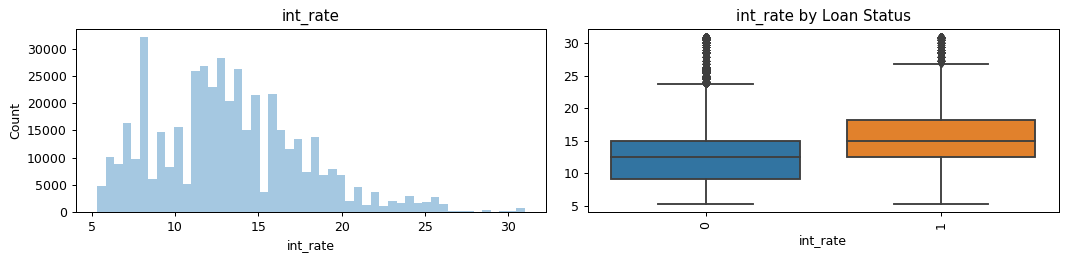

In [29]:
plot_feature(df_selected, 'int_rate', True)

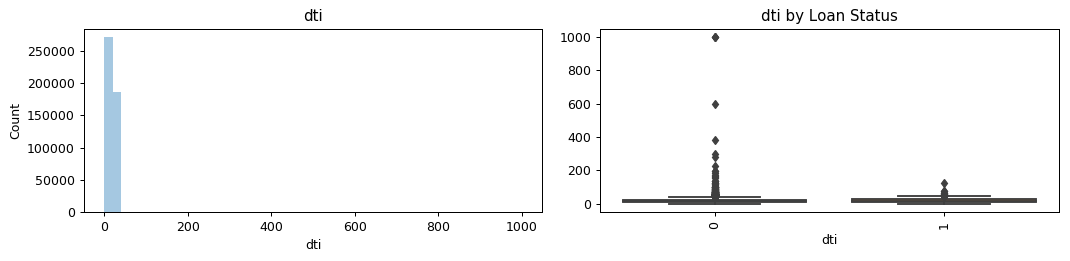

In [30]:
plot_feature(df_selected, 'dti', True)

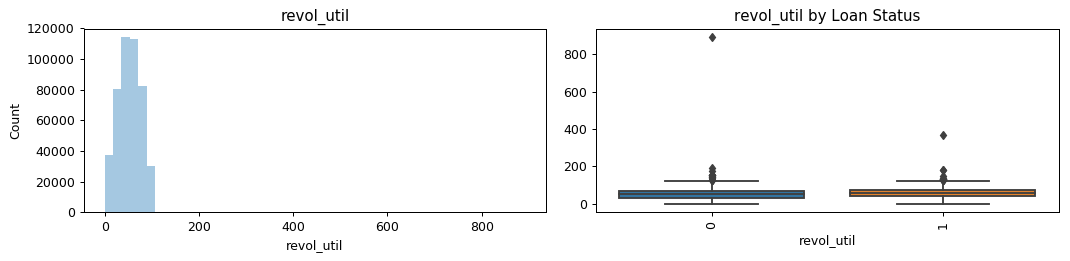

In [34]:
plot_feature(df_selected, 'revol_util', True)

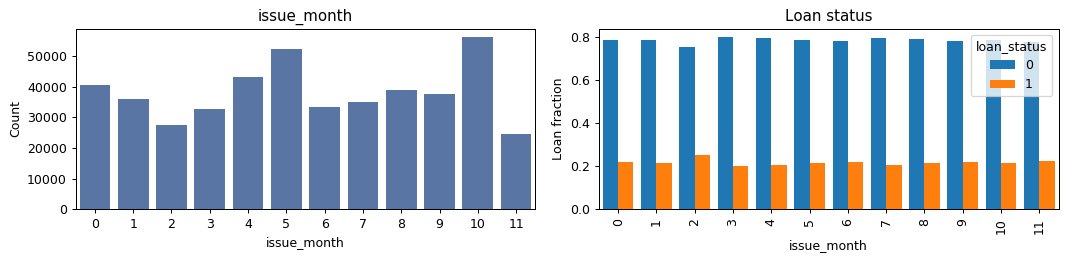

In [35]:
plot_feature(df_selected, 'issue_month', False)

### Observe the selected features

In [48]:
df_selected.shape

(457484, 29)

In [50]:
df_selected.head().T

,0,1,2,3,4
loan_amnt,3600.00,35000.00,17000.00,10000.00,5000.00
term,36.00,60.00,36.00,36.00,36.00
int_rate,7.49,25.49,7.49,11.49,14.99
sub_grade,3.00,23.00,3.00,9.00,13.00
emp_length,10.00,10.00,10.00,10.00,10.00
home_ownership,1.00,1.00,1.00,3.00,4.00
annual_inc,120000.00,114000.00,120000.00,145000.00,68000.00
verification_status,1.00,0.00,1.00,1.00,1.00
loan_status,0.00,0.00,0.00,0.00,0.00
purpose,9.00,4.00,2.00,2.00,2.00


In [36]:
df_selected.to_csv('./data/df_processed_v2.csv', index = False)